# Esimating Outage Frequency and Duration for Wyandotte County

This notebook uses data compiled with the EAGLE-I tool to estimate the outage frequency and duration of grid outages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import json
import os
from glob import glob
import geopandas as gpd
from us import states
from tqdm import tqdm

## Step 0: Gather data

This step retrieves data from the EAGLE-I dataset and filters it down to the county level. Here, we examine Wyandotte County, Kansas.

In [2]:
outage_files = {2018:"https://figshare.com/ndownloader/files/42547879",
                2019:"https://figshare.com/ndownloader/files/42547885",
                2020:"https://figshare.com/ndownloader/files/42547894",
                2021:"https://figshare.com/ndownloader/files/42547891",
                2022:"https://figshare.com/ndownloader/files/42547897",
                2023:"https://figshare.com/ndownloader/files/44574907"}

In [4]:
pd.read_csv(outage_files[2023])

,fips_code,county,state,sum,run_start_time
0,1003,Baldwin,Alabama,1,2023-01-01 00:00:00
1,1011,Bullock,Alabama,9,2023-01-01 00:00:00
2,1015,Calhoun,Alabama,4,2023-01-01 00:00:00
3,1021,Chilton,Alabama,4,2023-01-01 00:00:00
4,1029,Cleburne,Alabama,142,2023-01-01 00:00:00
...,...,...,...,...,...
26101046,55095,Polk,Wisconsin,0,2023-12-31 23:45:00
26101047,55105,Rock,Wisconsin,1,2023-12-31 23:45:00
26101048,55109,St. Croix,Wisconsin,0,2023-12-31 23:45:00
26101049,55129,Washburn,Wisconsin,0,2023-12-31 23:45:00


In [ ]:
%%time
frames = []
for year, url in tqdm(outage_files.items())
    df = pd.read_csv(url, parse_dates=True, index_col='run_start_time')
    frames.append(df)

  0%|          | 0/6 [04:22<?, ?it/s]


KeyboardInterrupt: 

In [7]:
"UP".capitalize()

'Up'

In [13]:
wyandotte_outage = outage_2023.loc[(outage_2023.county == 'Wyandotte')]

In [14]:
wyandotte_outage.loc[:,'run_start_time'] = pd.to_datetime(wyandotte_outage['run_start_time'])

In [16]:
wyandotte_outage.set_index('run_start_time', inplace=True)

c:\Users\SDotson\AppData\Local\miniforge3\envs\pypsa-illinois02\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Plot data for a specific outage of interest.

In [5]:
wyandotte_outage.loc['2023-07-12':'2023-07-19','sum'].plot()

NameError: name 'wyandotte_outage' is not defined

In [16]:
wyandotte_outage.columns

Index(['fips_code', 'county', 'state', 'sum', 'run_start_time'], dtype='object')

C:\Users\SDotson\AppData\Local\Temp\ipykernel_5724\2300140524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wyandotte_outage['run_start_time'] = pd.to_datetime(wyandotte_outage['run_start_time'])


In [20]:
wyandotte_outage = wyandotte_outage.set_index('run_start_time').resample('15min').ffill()

In [24]:
wyandotte_outage

,fips_code,county,state,sum
run_start_time,,,,
2023-01-01 08:00:00,20209,Wyandotte,Kansas,0
2023-01-01 08:15:00,20209,Wyandotte,Kansas,0
2023-01-01 08:30:00,20209,Wyandotte,Kansas,0
2023-01-01 08:45:00,20209,Wyandotte,Kansas,0
2023-01-01 09:00:00,20209,Wyandotte,Kansas,0
...,...,...,...,...
2023-12-31 21:15:00,20209,Wyandotte,Kansas,8
2023-12-31 21:30:00,20209,Wyandotte,Kansas,8
2023-12-31 21:45:00,20209,Wyandotte,Kansas,8


<Axes: xlabel='run_start_time'>

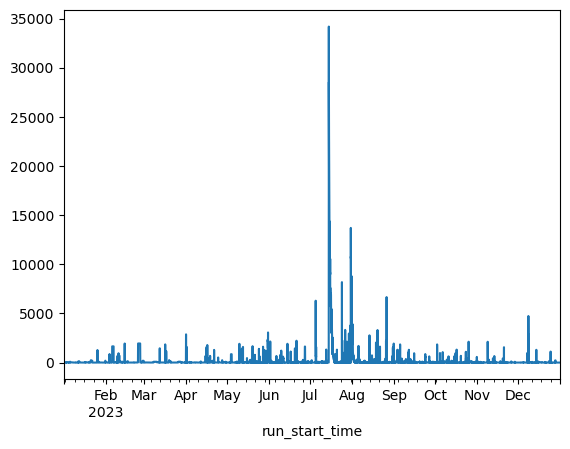

In [22]:
wyandotte_outage['sum'].plot()